# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [25]:
img = cv2.imread('kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(img)

In [26]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=5)
print("type unsharp:", unsharp.dtype)

type unsharp: uint8


In [27]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.

diff = img.astype(np.float32) - unsharp
print("type diff:", diff.dtype)
print(np.min(diff), np.max(diff))
#plt.imshow(diff)

type diff: float32
-118.0 161.0


(<Axes: >, <matplotlib.image.AxesImage at 0x25600b37440>)

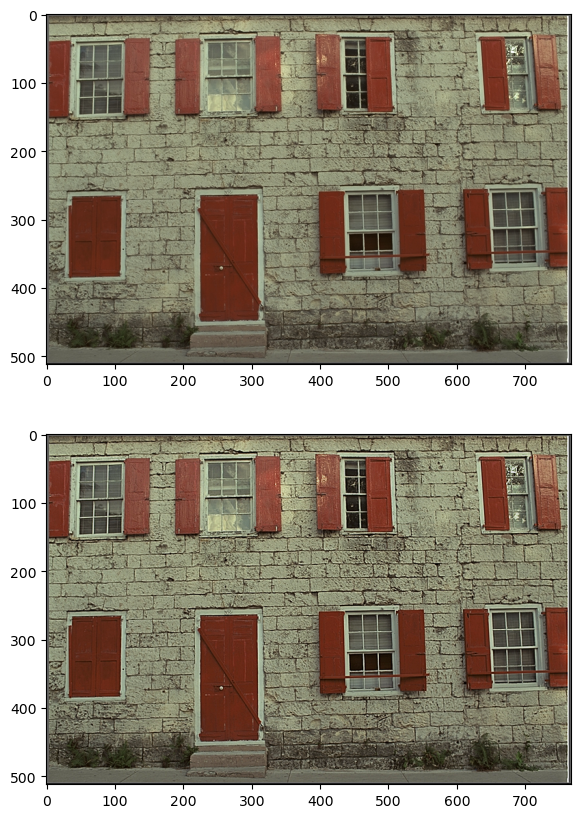

In [34]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amount = 0.6
sharpened = img + diff*amount

sharpened = np.clip(sharpened, 0, 225)
sharpened = sharpened.astype(np.uint8)

plt.subplot(211), plt.imshow(img)
plt.subplot(212), plt.imshow(sharpened)

In [29]:
#What is a good (reasonable) value for the amount parameter?
# все зависит от исходного материала и желаемого резульата, главное словить ту границу, когда картинка начинает вырождаться(corrupted). 
# Для тестовой картинки я считаю что оптимальный будет около 0.6

#What happens if it is too small?
# результат фактически не будет отличаться от оригинала

#What happens if it is too large?
# в слечае огромных коэффициентов (5 и больше) получим вырожденную карнинку с элементами, которых никогда в оригинале и небыло